In [1]:
%pylab inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf','svg', 'png')
from models import boson2d as mod
from mps.mps import iMPS
from mps import mpo
import cPickle
from algorithms import DMRG
from algorithms import simulation as simulation
from algorithms.linalg import np_conserved as npc

Populating the interactive namespace from numpy and matplotlib
Loaded libmkl_rt.so for dgesvd
Loaded libmkl_rt.so for zgesvd
Loaded libiomp5.so for omp
Running with omp_max_threads= 8


In [2]:
#Standard
def YC2nopen(n, Jv, Jh):

    h = [ [ (1, 0, Jv), (0, 1, Jh)] ]*(n-1) +  [  [(0, 1, Jh)] ]
    
    #h = [ [ (1, 0, Jv), (0, 1, Jh)] , [ (1, 0, 0.2*Jv), (0, 1, Jh)],  [(0, 1, Jh)] ]
    return h
def ax(n):
    return np.array([1, 0.])
def ay(n):
    return np.array([0, 1.])
a1 = 1/2.; a2 = np.sqrt(3)/2.;
def site_pos(n):
    return np.array([  [0, 0.] ])

In [30]:
J = 1.
Jv = J*4
Jh = J*4
Delta = 1.
Lx = 8
Ly = Lx
nZ = 0.1*2
model_par = {'verbose':1, 'dtype':np.float, 'Lx':Lx, 'nu':(1, 2), 'd':2,
             't': YC2nopen(Lx, -0.5*Jv, -0.5*Jh), 
             'U': YC2nopen(Lx, Jv*Delta, Jh*Delta),
             'ax': ax(Lx),
             'ay': ay(Lx),
             'Ly':Ly,
             'mu': [nZ, -nZ]*(Lx/2) + [-nZ, nZ]*(Lx/2), 
             'site_pos': site_pos(Lx),
             }
M = mod.boson2d_model(model_par)
print M.chi

	Lx = 8
	Ly = 8
	nu = (1, 2)
	d = 2
	ax = [ 1.  0.]
	ay = [ 0.  1.]
	site_pos = [[ 0.  0.]]
	dtype = <type 'float'>
	t = [[(1, 0, -2.0), (0, 1, -2.0)], [(1, 0, -2.0), (0, 1, -2.0)], [(1, 0, -2.0), (0, 1, -2.0)], [(1, 0, -2.0), (0, 1, -2.0)], [(1, 0, -2.0), (0, 1, -2.0)], [(1, 0, -2.0), (0, 1, -2.0)], [(1, 0, -2.0), (0, 1, -2.0)], [(0, 1, -2.0)]]
	U = [[(1, 0, 4.0), (0, 1, 4.0)], [(1, 0, 4.0), (0, 1, 4.0)], [(1, 0, 4.0), (0, 1, 4.0)], [(1, 0, 4.0), (0, 1, 4.0)], [(1, 0, 4.0), (0, 1, 4.0)], [(1, 0, 4.0), (0, 1, 4.0)], [(1, 0, 4.0), (0, 1, 4.0)], [(0, 1, 4.0)]]
	mu = [0.2, -0.2, 0.2, -0.2, 0.2, -0.2, 0.2, -0.2, -0.2, 0.2, -0.2, 0.2, -0.2, 0.2, -0.2, 0.2]
Detecting MPO charges...
	Trimming MPO chi[0]: 26 -> 8
	Trimming MPO chi[1]: 26 -> 11
	Trimming MPO chi[2]: 26 -> 14
	Trimming MPO chi[3]: 26 -> 17
	Trimming MPO chi[4]: 26 -> 20
	Trimming MPO chi[5]: 26 -> 23
	Trimming MPO chi[56]: 26 -> 23
	Trimming MPO chi[57]: 26 -> 20
	Trimming MPO chi[58]: 26 -> 17
	Trimming MPO chi[59]: 26 -> 14
	T

In [31]:
p_f = [0, 1]*(Lx*Ly/2)
psi = iMPS.product_imps(M.d, p_f, dtype=np.float, conserve = M, bc='finite')
sim = simulation.simulation(psi, M)

In [32]:
sim_par =  {'CHI_LIST':{0:320},
            'TRUNC_CUT':10**(-7),
            'VERBOSE': True,
            'N_STEPS': 1,
            'UPDATE_ENV': 0,
            'STARTING_ENV_FROM_PSI': 1,
            'MAX_ERROR_E' :10**(-9),
            'MAX_ERROR_S' : 1*10**(-3),
            'MIN_STEPS' : 5,
            'MAX_STEPS': 15,
            'SVD_MAX' : 26.,
            'save_mem': False,
            'LANCZOS_PAR' : {'N_min':2, 'N_max':14, 'p_tol': 10**(-6), 'p_tol_to_trunc': 1/25., 'cache_v':np.inf},
            'mixer':(0.01, 2., 8, 'id'),
            'DISPLAY_ESTATS':True
            }
sim.dmrg_par = sim_par

In [ ]:
sim_par['STARTING_ENV_FROM_PSI'] = 1
#sim.dmrg_par['CHI_LIST'] = {0:100, 1:300,}# 2:400, 3:500, 4:600}
#sim.dmrg_par['CHI_LIST'] = {0:600, 1:900, 2:1200, 3:1500, 4:1800, 5:2100, 6:2400}
#sim.dmrg_par['CHI_LIST'] = {0:2100, 1:2400, 2:2700, 3:3000}
#sim.dmrg_par['CHI_LIST'] = {0:3200, 1:3400}
#sim.dmrg_par['CHI_LIST'] = {0:600, 1:900, 2:1200, 3:1500, 4:1800}
sim.dmrg_par['CHI_LIST'] = {0:2000}
#sim.dmrg_par['CHI_LIST'] = {0:400, 1:600, 2:800}
sim.dmrg_par['mixer'] = (1e-5, 2., 0, 'id')
sim.dmrg_par['MIN_STEPS'] = 4
sim.dmrg_par['MAX_STEPS'] = 4
sim.ground_state()
psi.canonical_form()

Finding ground state...
Using 0_new  engine.
Initializing environment from sim_par.
Beginning optimization...

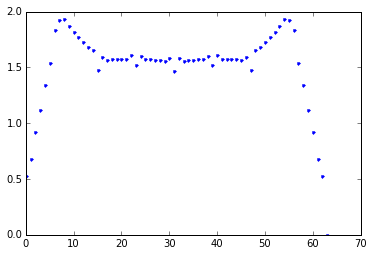

In [47]:
plot(psi.entanglement_entropy(), '.')

In [29]:
#6x6
edmrg = sim.sim_stats[-1]['Es'][-1]/Lx/Ly
print edmrg

-2.45213360692


In [48]:
#8x8
edmrg = sim.sim_stats[-1]['Es'][-1]/Lx/Ly
print edmrg

-2.52417590352


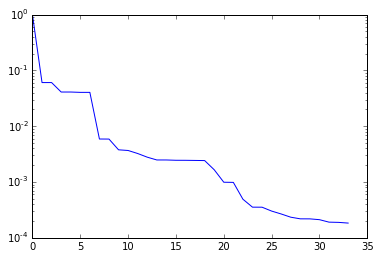

In [72]:
plot(-np.sort(-psi.s[6*3-1]))
yscale('log')

In [39]:
N = psi.site_expectation_value(M.dN).reshape((-1, Lx)).T

<matplotlib.colorbar.Colorbar instance at 0x2ebd9878>

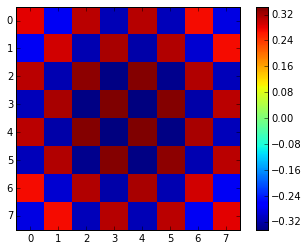

In [40]:
imshow(N, interpolation='nearest')
colorbar()